In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import os
import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [7]:

df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [10]:
df.shape

(19237, 18)

In [11]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [12]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [13]:
df.drop(['ID'], axis=1,inplace=True)
df['Levy']

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [15]:
df['Engine volume'] = pd.to_numeric(df['Engine volume'],errors='coerce')
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    NaN
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [26]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: int64

In [28]:
df.duplicated().sum()

3512

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.isna().sum()

Price                  0
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1889
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [32]:
df['Engine volume'].fillna(df['Engine volume'].mean(),inplace=True)

In [40]:
string_columns=df.select_dtypes("object").columns.to_list()
string_columns

['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [53]:

all_columns = df.columns.tolist()

string_columns = df.select_dtypes(include=['object', 'string']).columns.tolist()

num_columns = [col for col in all_columns if col not in string_columns]

print( num_columns)


['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']


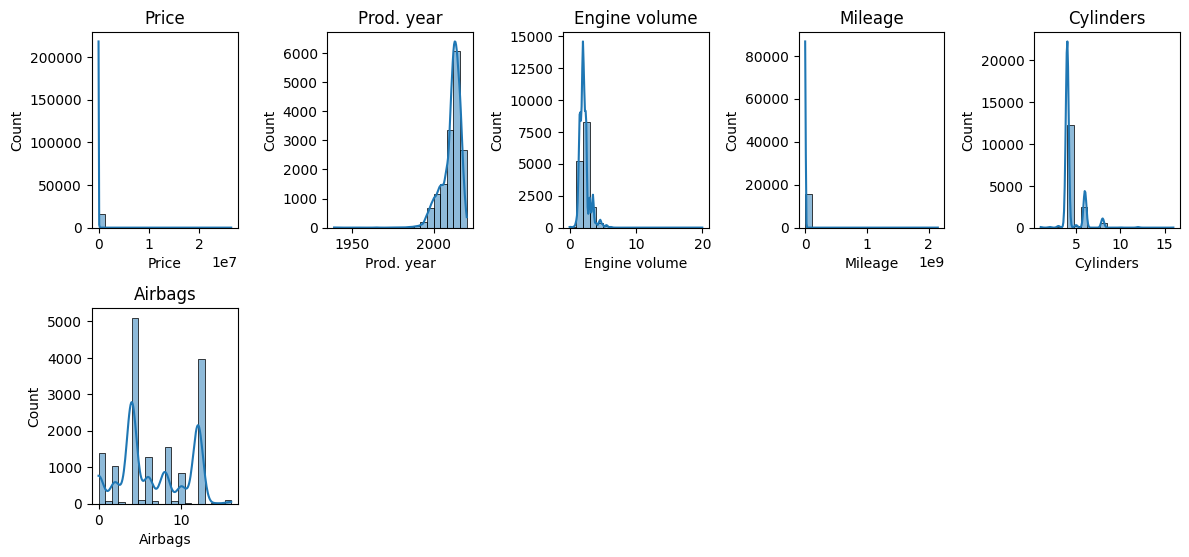

In [54]:
plt.figure(figsize=(12, 8))
for feature in num_columns:
    plt.subplot(3, 5,num_columns.index(feature)+1)
    sns.histplot(data=df[feature],bins=20,kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

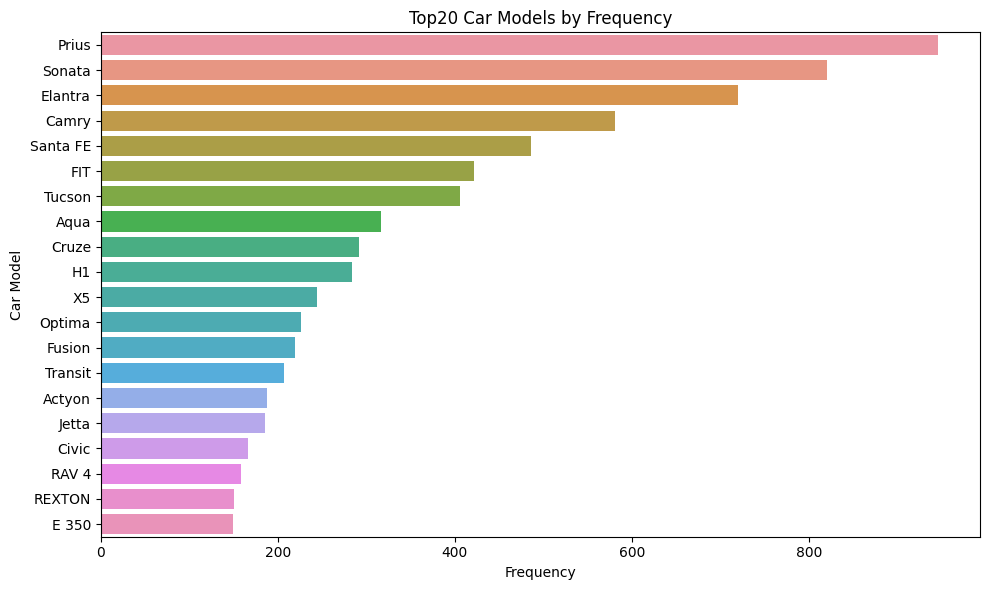

In [56]:
n = 20
top_car_models = df['Model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values,y=top_car_models.index)
plt.title(f'Top{n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

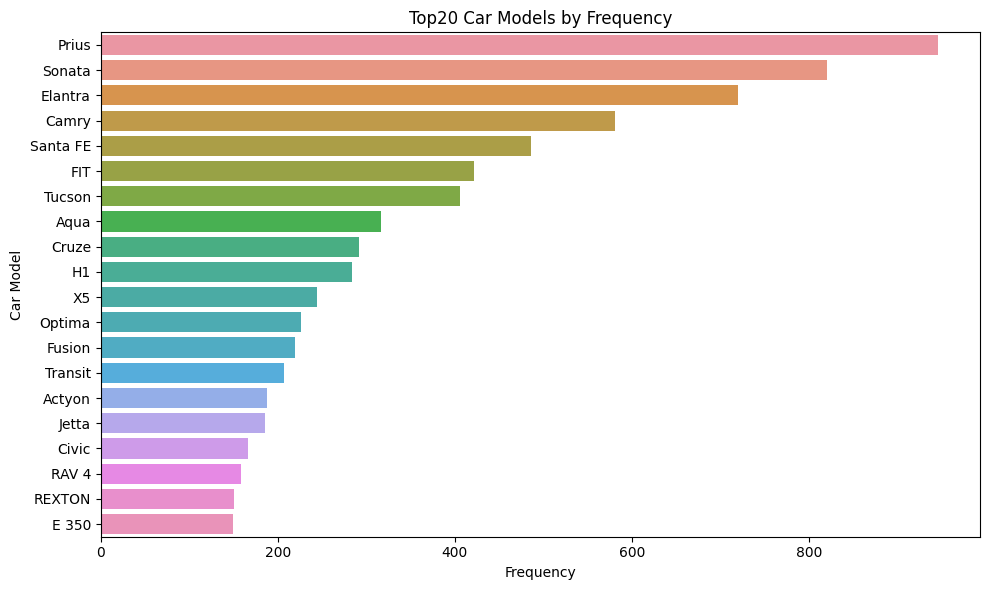

In [57]:
avg_prices_by_car = df.groupby('Model')['Price'].mean().sort_values(ascending=False)

n=20
top_car_models = df['Model'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values,y=top_car_models.index)
plt.title(f'Top{n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

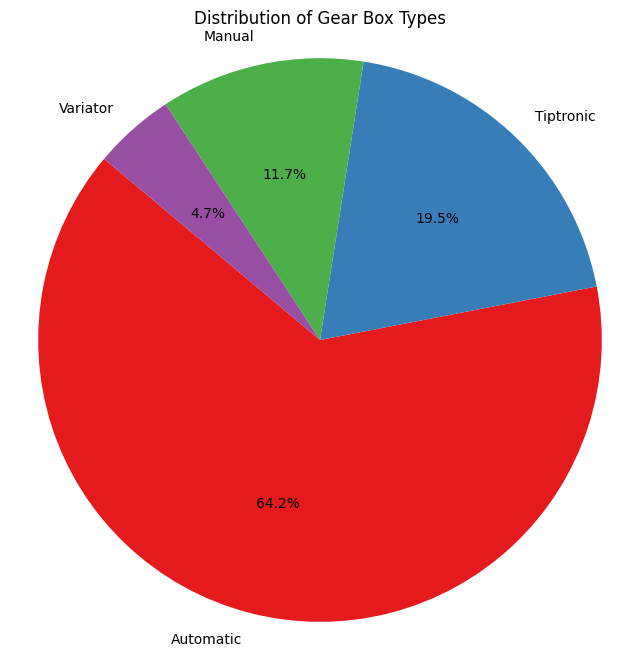

In [62]:
category_counts = df['Gear box type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    category_counts,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set1')
)
plt.title("Distribution of Gear Box Types")
plt.axis('equal')  # Pie chart aylana ko‘rinishida chiqadi
plt.show()


In [65]:

label_encoder = LabelEncoder()

for column in string_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,3.5,186005,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,3.0,192000,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,1.3,200000,4.0,3,1,1,1,1,2
3,3607,512,16,661,2011,4,1,2,2.5,168966,4.0,0,0,1,0,14,0
4,11726,366,21,684,2014,3,1,5,1.3,91901,4.0,0,1,1,0,12,4


In [66]:
df.corrwith(df['Price']).abs().sort_values(ascending=False)

Price               1.000000
Doors               0.030481
Category            0.019942
Fuel type           0.017402
Wheel               0.016957
Prod. year          0.014836
Color               0.012122
Gear box type       0.011219
Airbags             0.010791
Cylinders           0.010546
Levy                0.006746
Drive wheels        0.006350
Engine volume       0.006346
Leather interior    0.005972
Mileage             0.002011
Manufacturer        0.001663
Model               0.000016
dtype: float64

In [67]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
Price,1.000000,0.006746,0.001663,0.000016,0.014836,0.019942,0.005972,0.017402,0.006346,0.002011,0.010546,0.011219,0.006350,0.030481,0.016957,0.012122,0.010791
Levy,0.006746,1.000000,0.086010,0.067015,0.452116,0.074752,0.310600,0.036697,0.195588,0.028830,0.262267,0.285647,0.010230,0.128760,0.277041,0.057611,0.032384
Manufacturer,0.001663,0.086010,1.000000,0.020632,0.067620,0.061569,0.209680,0.089093,0.083775,0.014024,0.119498,0.073032,0.084401,0.049806,0.101258,0.026937,0.072808
Model,0.000016,0.067015,0.020632,1.000000,0.075971,0.143600,0.001148,0.189053,0.024978,0.008868,0.021536,0.063805,0.199024,0.073787,0.036226,0.074849,0.074068
Prod. year,0.014836,0.452116,0.067620,0.075971,1.000000,0.056011,0.369836,0.070212,0.055916,0.064121,0.124283,0.189928,0.138292,0.173849,0.214463,0.019778,0.283079
Category,0.019942,0.074752,0.061569,0.143600,0.056011,1.000000,0.087524,0.152058,0.040350,0.009529,0.028224,0.003299,0.208619,0.230119,0.120011,0.020599,0.102285
Leather interior,0.005972,0.310600,0.209680,0.001148,0.369836,0.087524,1.000000,0.003625,0.230378,0.032572,0.180162,0.232932,0.053246,0.083279,0.323518,0.054347,0.190339
Fuel type,0.017402,0.036697,0.089093,0.189053,0.070212,0.152058,0.003625,1.000000,0.070035,0.018539,0.098168,0.078182,0.057445,0.046832,0.069021,0.100270,0.169027
Engine volume,0.006346,0.195588,0.083775,0.024978,0.055916,0.040350,0.230378,0.070035,1.000000,0.004722,0.676353,0.050512,0.131170,0.034087,0.183312,0.111054,0.251440
Mileage,0.002011,0.028830,0.014024,0.008868,0.064121,0.009529,0.032572,0.018539,0.004722,1.000000,0.000580,0.013449,0.007634,0.005697,0.015161,0.014393,0.010529


In [72]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_train)

In [78]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


Mean Absolute Error: 13325.93
Mean Squared Error: 364806090.25
